<a href="https://colab.research.google.com/github/StratosFair/DNN_Classifiers_Fast_Rates/blob/main/fashion_mnist_margin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

In [7]:
# Load Fashion-MNIST dataset
fashion_transform = transforms.Compose([transforms.ToTensor()])
fashion_train = datasets.FashionMNIST(root="./data", train=True, download=True, transform=fashion_transform)

# Fashion-MNIST Classes
fashion_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Filter for classes 'T-shirt' (class 0) and 'Pullover' (class 2)
indices_tshirt = [i for i, (img, label) in enumerate(fashion_train) if label == 0]
indices_pullover = [i for i, (img, label) in enumerate(fashion_train) if label == 2]

# Pick 3 random samples from each class
np.random.seed(42)  # For reproducibility
chosen_tshirts = np.random.choice(indices_tshirt, 3, replace=False)
chosen_pullovers = np.random.choice(indices_pullover, 3, replace=False)

# Create subsets of the selected images
data_tshirt = Subset(fashion_train, chosen_tshirts)
data_pullover = Subset(fashion_train, chosen_pullovers)

# Convert the images into tensors for easy manipulation
tshirts = torch.stack([data_tshirt[i][0].squeeze() for i in range(len(data_tshirt))])
pullovers = torch.stack([data_pullover[i][0].squeeze() for i in range(len(data_pullover))])

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 205kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.41MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.8MB/s]


In [8]:
# Interpolation function
def interpolate_images(image1, image2, alpha):
    """
    Interpolate between two images given an alpha parameter.
    """
    return (1 - alpha) * image1 + alpha * image2

In [9]:
# Interpolate between each pair (three rows, eight steps per row)
alphas = np.linspace(0, 1, 8)  # 8 interpolation steps (from 0 to 1)
interpolations = []

for i in range(3):  # For each pair of images
    row = []
    for alpha in alphas:
        interpolated_image = interpolate_images(tshirts[i], pullovers[i], alpha)
        row.append(interpolated_image)
    interpolations.append(row)

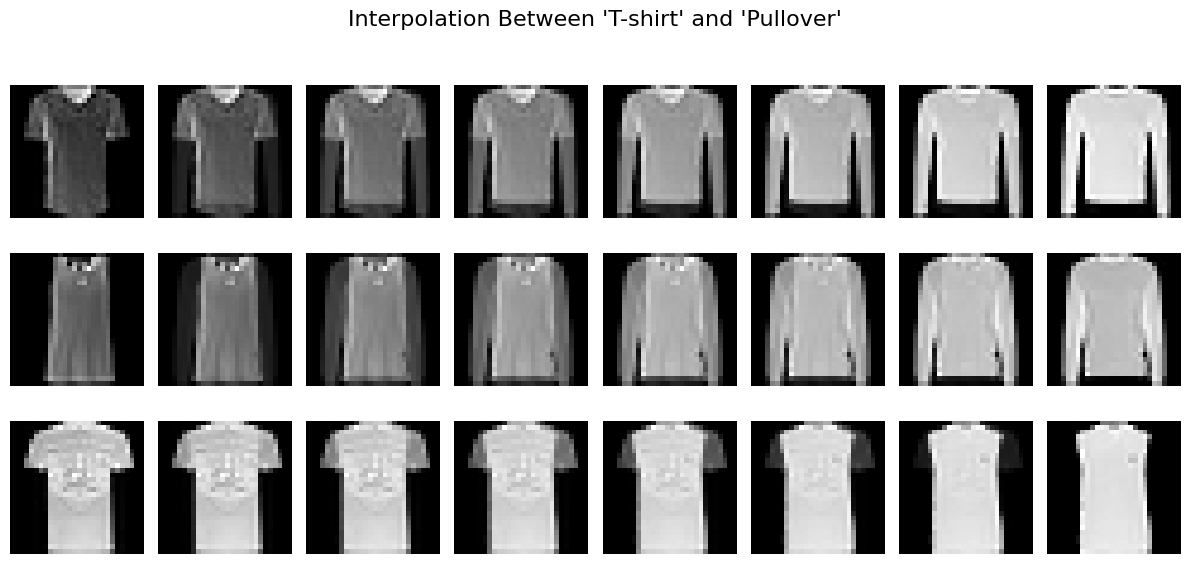

In [10]:
import matplotlib.pyplot as plt

# Plot each row of interpolations
fig, axes = plt.subplots(3, 8, figsize=(12, 6))  # 3 rows, 8 columns
fig.suptitle("Interpolation Between 'T-shirt' and 'Pullover'", fontsize=16)

for row_idx, row in enumerate(interpolations):
    for col_idx, image in enumerate(row):
        axes[row_idx, col_idx].imshow(image.numpy(), cmap="gray")
        axes[row_idx, col_idx].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title spacing
plt.show()